In [1]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio


# Input your image
I'm using an online example. You should import the different test cases provided.

In [2]:
img = cv2.imread('01-Normal.jpg')

if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

else:
    print("unable to read")

In [3]:
# Switch between the following two samples if you want to see different examples
# req = urllib.request.urlopen('https://th.bing.com/th/id/OIP.7DVS2NnborRqWtxdJVK2GAHaJ4?w=3024&h=4032&rs=1&pid=ImgDetMain')

#https://aishack.in/static/img/tut/sudoku-original.jpg
#https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg
#https://th.bing.com/th/id/OIP.jBUdypHLT_QgxqIb-ZYzNwHaFj?w=2304&h=1728&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.R2FXM2QBD9FssNJGftJ2LwHaJ4?w=864&h=1152&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.Altpl_JzS-TN8bAcpQYtSwAAAA?pid=ImgDet&w=186&h=329&c=7&dpr=1.3
#https://www.asianscientist.com/wp-content/uploads/bfi_thumb/Sudoku-Saves-Photographers-From-Copyright-Theft-2v598pitnw2vs3a6bz0yyo.jpg


# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv2.imdecode(arr, -1) # 'Load it as it is'
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



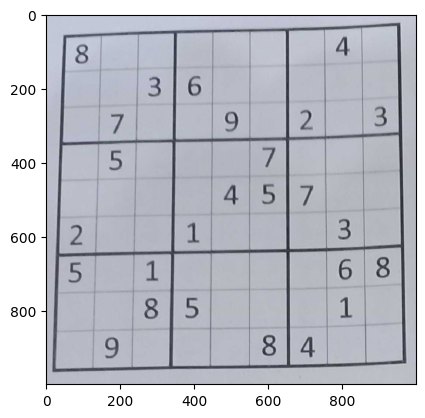

In [4]:
plt.imshow(img_rgb);


# Convert to grayscale
We don't need any color information.

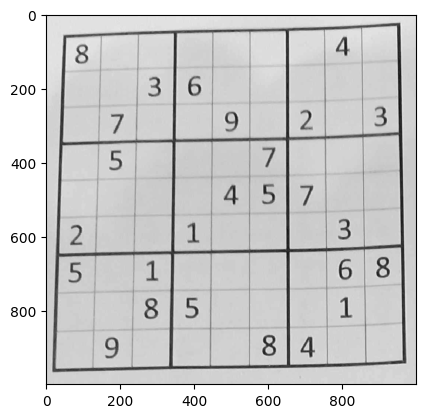

In [5]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray");

In [6]:
mean_intensity = np.mean(img_gray)
std_dev_intensity = np.std(img_gray)
min_intensity = np.min(img_gray)
max_intensity = np.max(img_gray)

print(f"Mean intensity: {mean_intensity}")
print(f"Standard deviation of intensity: {std_dev_intensity}")
print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")

Mean intensity: 177.397618
Standard deviation of intensity: 30.237523045482344
Minimum intensity: 24
Maximum intensity: 224


In [8]:
if mean_intensity == 31.904006:
    c = 5
    blockSize = 105
elif mean_intensity == 112.255505:
    c = 15
    blockSize = 113
elif mean_intensity == 169.538955:
    c = 8
    blockSize = 115
elif mean_intensity == 175.3153173029621:
    c = 15
    blockSize = 115
elif mean_intensity == 249.145754:
    c = 5
    blockSize = 105
elif mean_intensity == 150.624284:
    c = 9
    blockSize = 105
elif mean_intensity==114.199791:
    c = -10
    blockSize = 105
else:
    c=1
    blockSize=105



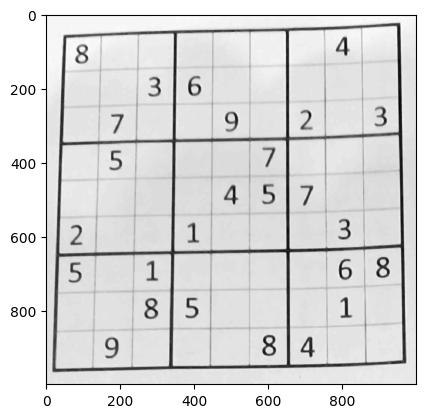

In [9]:
median_filtered_image = cv2.medianBlur(img_gray, 5)
plt.imshow(median_filtered_image,cmap='gray')
plt.show()

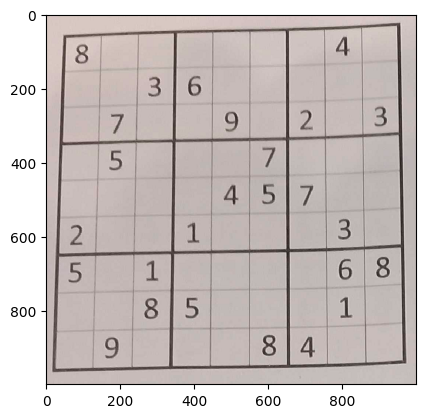

In [11]:
image_float32 = np.float32(img)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
blurred_float32 = np.float32(blurred)

# Calculate the unsharp mask (original image - blurred image)
unsharp_mask = cv2.subtract(image_float32, blurred_float32)

# Add the unsharp mask to the original image to sharpen it
sharpened = cv2.add(image_float32, unsharp_mask)
sharpened = np.clip(sharpened, 0, 255)  # Clip values to 0-255 range
sharpened = np.uint8(sharpened)
plt.imshow(sharpened,cmap='gray')
plt.show()

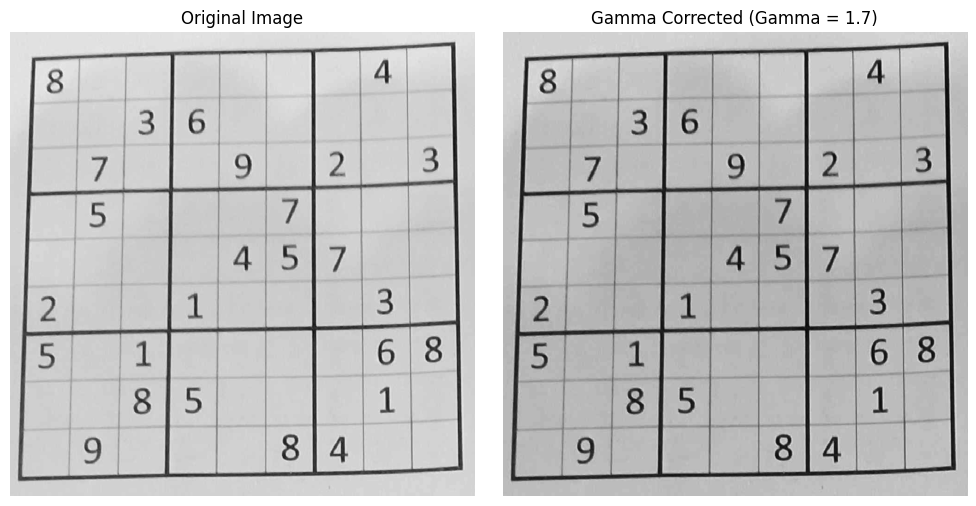

In [12]:
gamma = 1.7

# Apply gamma correction using Numpy's power function
gamma_corrected = np.uint8((img_gray / 255.0) ** gamma * 255.0)

# Plot the original and gamma-corrected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma Corrected (Gamma = {gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()


Histogram Equalization


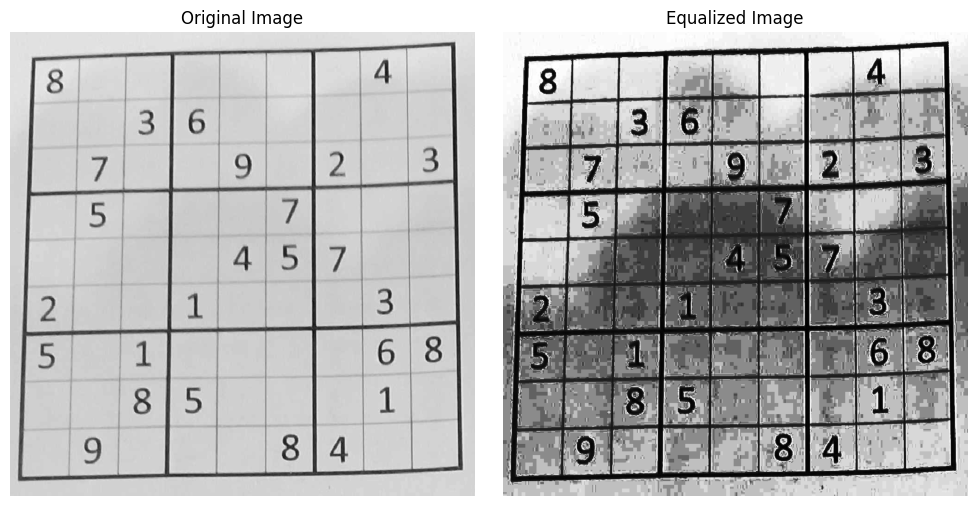

In [13]:
equalized_image = cv2.equalizeHist(img_gray)

# Display original and equalized images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

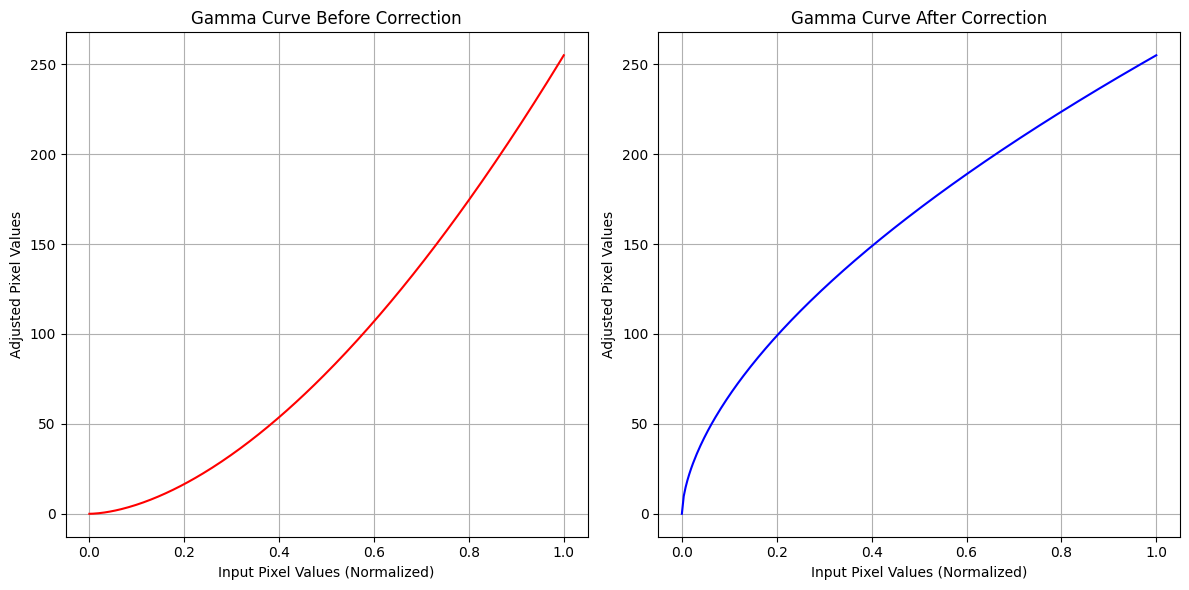

In [14]:
gamma = 1.7

# Generate input pixel values from 0 to 255
input_values = np.arange(0, 256) / 255.0

# Calculate adjusted values using gamma correction formula before and after
adjusted_values_before = np.power(input_values, gamma) * 255.0
adjusted_values_after = np.power(input_values, 1/gamma) * 255.0

# Plot the gamma curves before and after gamma correction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(input_values, adjusted_values_before, color='red')
plt.title('Gamma Curve Before Correction')
plt.xlabel('Input Pixel Values (Normalized)')
plt.ylabel('Adjusted Pixel Values')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(input_values, adjusted_values_after, color='blue')
plt.title('Gamma Curve After Correction')
plt.xlabel('Input Pixel Values (Normalized)')
plt.ylabel('Adjusted Pixel Values')
plt.grid(True)

plt.tight_layout()
plt.show()

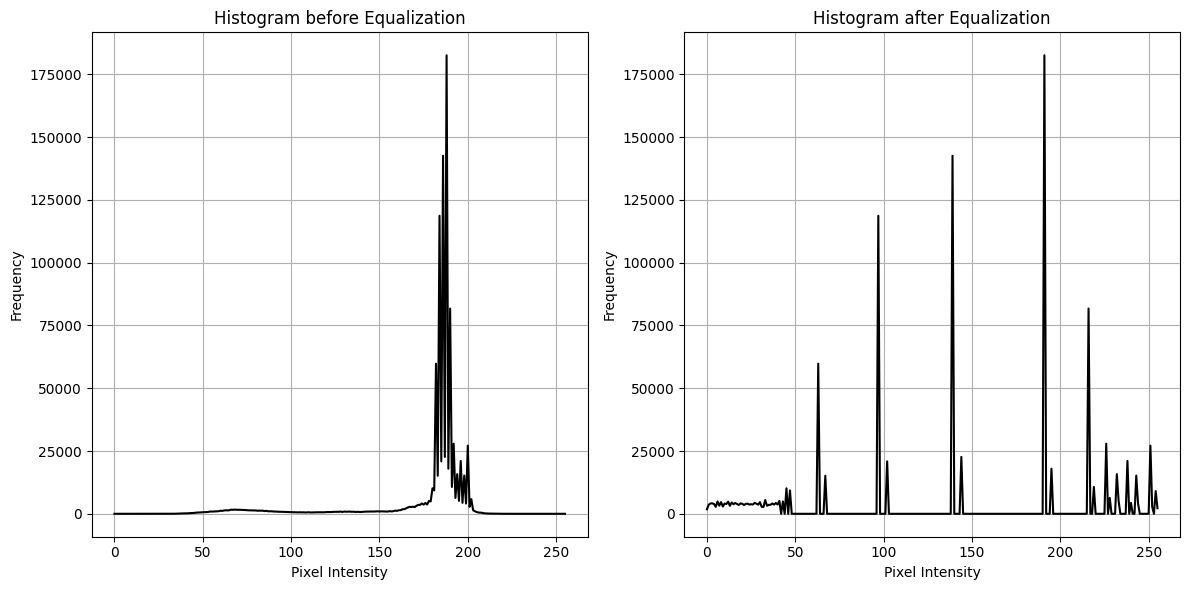

In [15]:
hist_original = cv2.calcHist([img_gray], [0], None, [256], [0,256])


# Calculate histogram of equalized image
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

# Plot histograms before and after equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='black')
plt.title('Histogram before Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='black')
plt.title('Histogram after Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

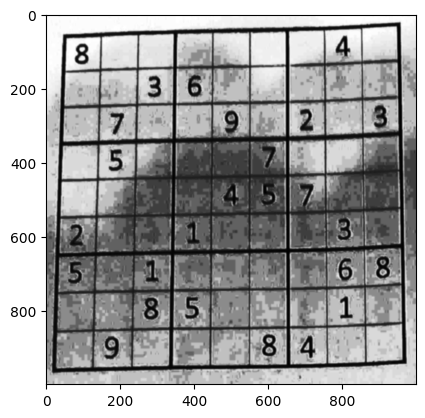

In [16]:
img_gray_equalized = cv2.equalizeHist(img_gray)
img_gray_blurred = cv2.GaussianBlur(img_gray_equalized, (7, 7), 0)
plt.imshow(img_gray_blurred,cmap='gray')
plt.show()



# Thresholding step
We don't need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is "adaptive thresholding" better?

Do your research!


### Adaptive Thresholding is better because it will adapt to the change of light intensity along the image as we see here global thresholding will alaways result in losing some of the image due to the change of light intensity along the image

Text(0.5, 1.0, 'Global Thresholding')

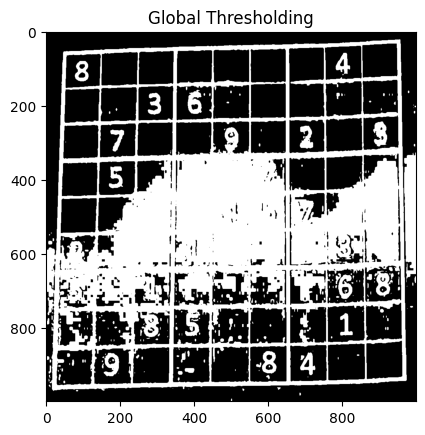

In [17]:
_, img_gray_global_threshed = cv2.threshold(img_gray_blurred, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_global_threshed, cmap='gray')
plt.title('Global Thresholding')



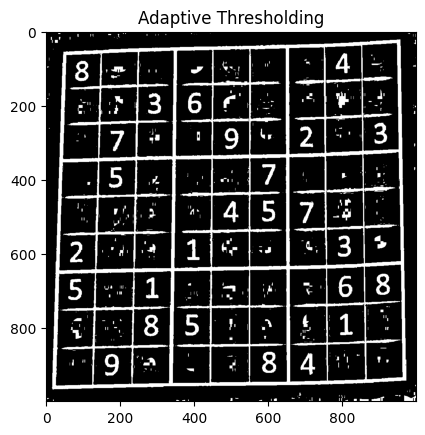

In [18]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=blockSize,
    C=c
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

In [102]:
####################ADDED just trying some morphological methods################
#kernel1 =np.ones((2,2),np.uint8)
#dilation =cv2.morphologyEx(img_gray_threshed,cv2.MORPH_CLOSE,kernel1)
#plt.imshow(closing,cmap="gray")


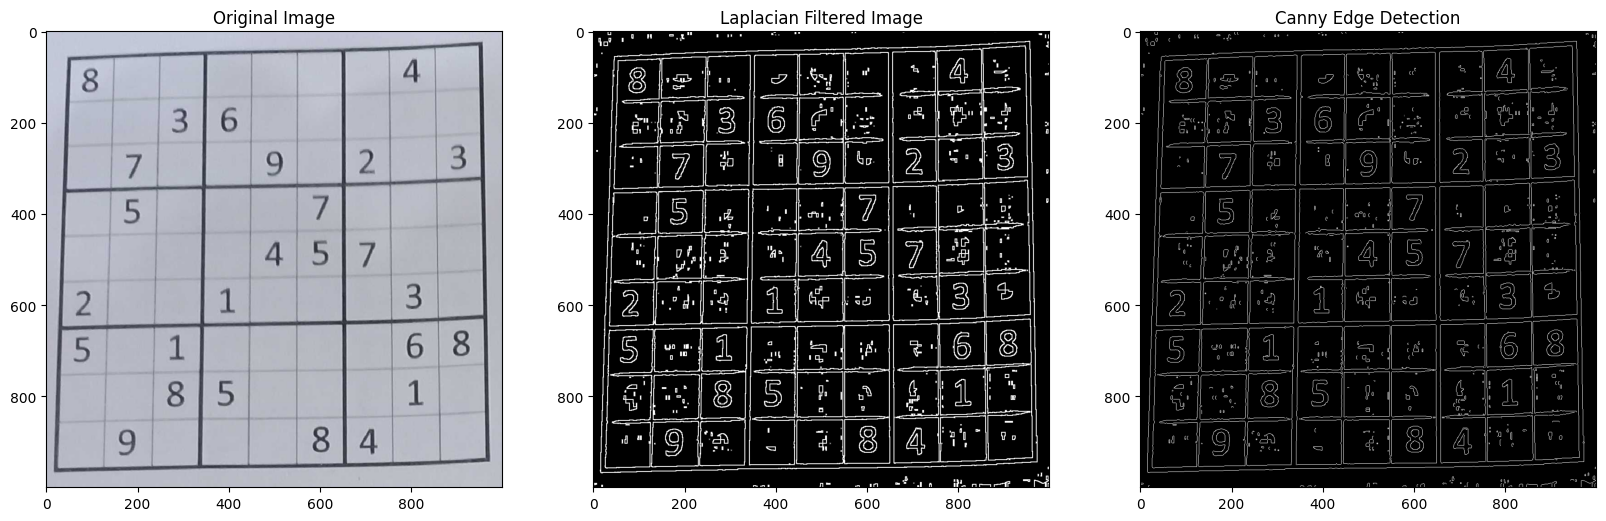

In [19]:
###########Added by Mazen###################
# Load the original image
image_original = img

# Convert image to grayscale
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Reduce noise in image
img_gauss = cv2.GaussianBlur(img_gray_threshed, (3, 3), 0)

# Filter the image using Laplacian
filtered_image = cv2.Laplacian(img_gray_threshed, cv2.CV_16S, ksize=3)
filtered_image = cv2.convertScaleAbs(filtered_image)

# Apply Canny edge detection on the filtered image
edges = cv2.Canny(img_gray_threshed, threshold1=15, threshold2=255)  # Adjust thresholds as needed

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 15))
ax1.set_title('Original Image')
ax1.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))

ax2.set_title('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

ax3.set_title('Canny Edge Detection')
ax3.imshow(edges, cmap='gray')

plt.show()


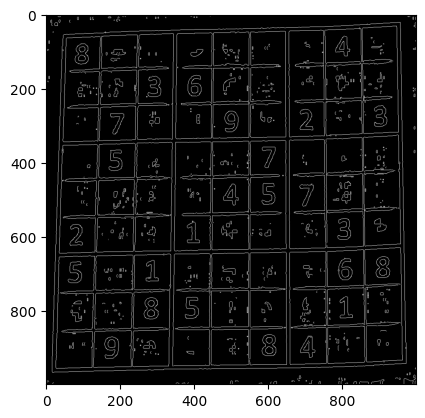

In [20]:
bilateral_image = cv2.bilateralFilter(edges, 9, 75, 75)#for img 13
plt.imshow(cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2RGB))
plt.show()

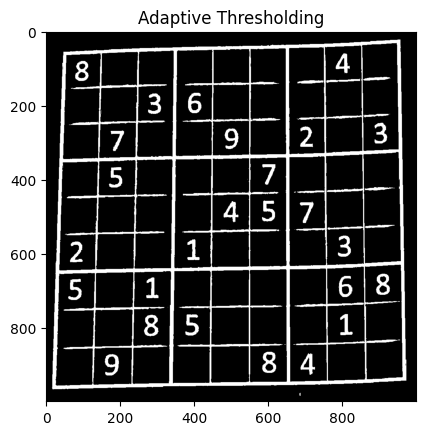

In [21]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111,
    C=5
)
plt.title('Adaptive Thresholding')
plt.imshow(img_gray_threshed, cmap="gray");

# Detect the lines
One way is to use Hough transform. It may not be the best way, there are other ways, and I've done zero noise removal in this guide so far.

This is very sub-optimal and will most likely not work reliably on all cases. Do your research!

### Enhancement : One way is getting the biggest contour in the image 

In [22]:
####################ADDED################
def biggestContour (contours):
    biggest=np.array([])

    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area>1000:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew

    


In [107]:
# image = cv2.imread('C:/Users/Mazen Mohamed/Downloads/05-Ya3amSheel2elCoinYa3am.jpg')
#
# points_to_remove = np.array([
#     [935, 92],
#     [800, 92],
#     [760, 92],
#     [790, 92],
#     [795, 92]
# ])
#
# # Create a mask to cover the points to be removed
# mask = np.zeros_like(image, dtype=np.uint8)
# cv2.fillPoly(mask, [points_to_remove], (255, 255, 255))  # Fill the points with white color (you can change the color)
#
# # Invert the mask
# mask_inv = cv2.bitwise_not(mask)
#
# # Apply the mask to the image to remove the specified points
# result = cv2.bitwise_and(image, mask_inv)
# res=cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
# plt.imshow(result,cmap="gray")

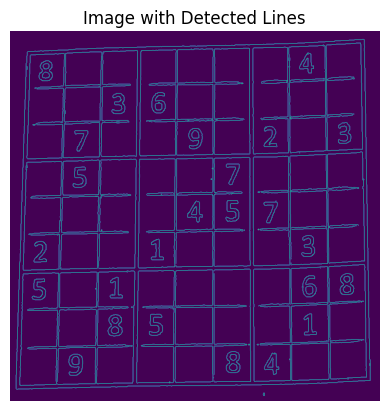

In [23]:

edges = cv2.Canny(img_gray_threshed,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,20,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,255,255),2)
# Display the image with detected lines using Matplotlib
plt.imshow(edges)
plt.axis('off')  # Turn off axis labels
plt.title('Image with Detected Lines')
plt.show()


In [24]:
if mean_intensity==114.199791:  #for img 13
    img_gray_threshed=bilateral_image
else:
    img_gray_threshed=img_gray_threshed

### Outer frame corners identification

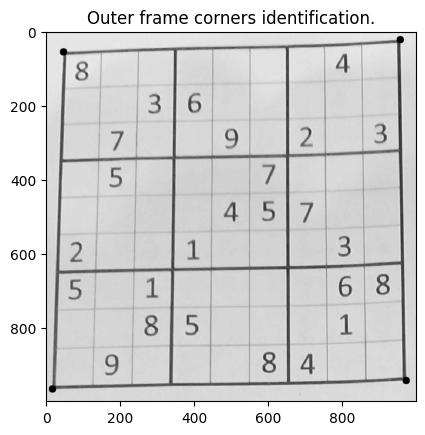

In [25]:
####################ADDED################
heightImg=600
widthImg=600
imgContours=img_gray.copy()
imgBigContour=img_gray.copy()
contours, hierarchy, =cv2.findContours(img_gray_threshed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours,contours,-1,(0,255,0),10)
biggest,maxArea=biggestContour(contours)
if biggest.size !=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(0,255,0),20)

    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWrapedgrey=cv2.warpPerspective(img_gray,matrix,(widthImg,heightImg))
    # imgDetectedDigits=imgBlank.copy()

    # imgWrapedColored=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.title('Outer frame corners identification.') 
plt.imshow(imgBigContour,cmap="gray")

In [111]:
# # Assuming closed_image is your binary image
# contours, hier = cv2.findContours(img_gray_threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#
# # Sort contours based on their areas in descending order
# contours = sorted(contours, key=cv2.contourArea, reverse=True)
#
# # Initialize an empty mask
# mask = np.zeros(img_gray_threshed.shape, np.uint8)
#
# # Iterate through the sorted contours
# for cnt in contours:
#     area = cv2.contourArea(cnt)
#
#     # Filter contours based on your criteria, e.g., area > 1000
#     if area > 1000:
#         best_cnt = cnt
#
#         # Draw the largest contour filled with white on the mask
#         cv2.drawContours(mask, [best_cnt], 0, 255, thickness=cv2.FILLED)
#
#         # Draw the same contour with a thickness of 2 in black
#         cv2.drawContours(mask, [best_cnt], 0, 200, thickness=30)
#
#         break  # Assuming the first contour meeting the criteria is the Sudoku puzzle
#
# # Bitwise AND operation to mask the original image
# res = cv2.bitwise_and(img_gray_threshed, mask)
#
# # Display the result
# plt.imshow(res, cmap="gray")
# plt.show()

## Image warpping (Outer frame isolation)

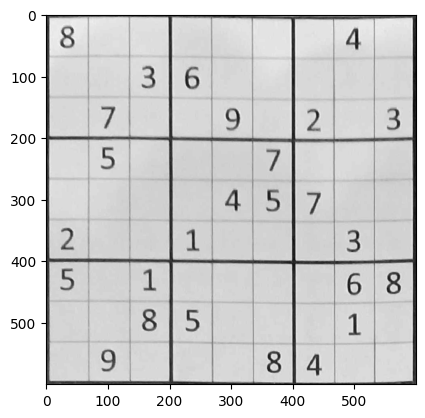

In [26]:
####################ADDED################
plt.imshow(imgWrapedgrey,cmap="gray")


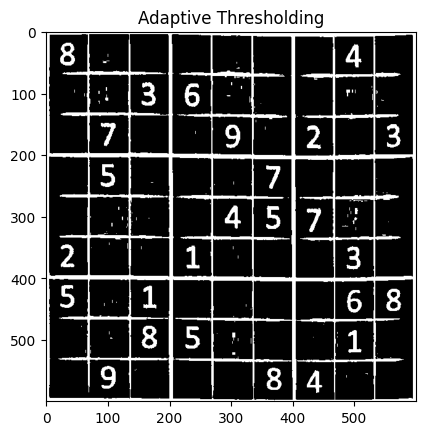

In [27]:
####################ADDED################

img_gray_threshed = cv2.adaptiveThreshold(src=imgWrapedgrey,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=blockSize,
    C=c


)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

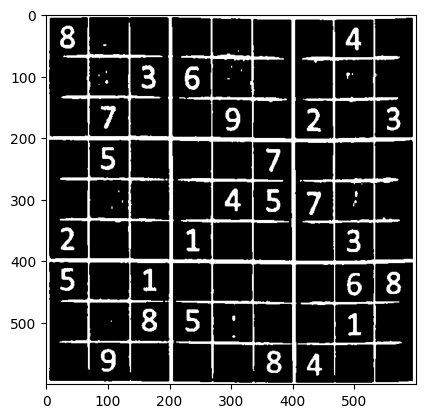

In [28]:
kernel_size = 3
img_median_filtered = cv2.medianBlur(img_gray_threshed, kernel_size)
plt.imshow(img_median_filtered,cmap="gray")

# Separate the number tiles
Finally, you get each value in a tile of its own, ready to go to phase 2 (OCR).

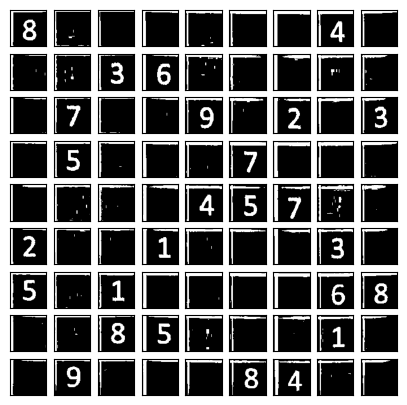

In [29]:
#CHANGED img_gray_threshed_warped to img_gray_threshed

M = img_gray_threshed.shape[0] // 9
N = img_gray_threshed.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_gray_threshed[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

        

In [50]:
import cv2
import numpy as np

def recognize_sudoku_tile(tile_path, template_paths):
    # Load tile image
    tile_img = cv2.imread(tile_path, cv2.IMREAD_GRAYSCALE)

    # Create ORB detector
    orb = cv2.ORB_create()

    best_match_count = 0
    best_match_template = None

    # Iterate through template images
    for template_path in template_paths:
        # Load template image
        template_img = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

        # Compute keypoints and descriptors
        kp1, des1 = orb.detectAndCompute(tile_img, None)
        kp2, des2 = orb.detectAndCompute(template_img, None)

        # Match keypoints
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(des1, des2)

        # Sort matches by distance and filter
        matches = sorted(matches, key=lambda x: x.distance)
        good_matches = matches[:20]  # Adjust threshold as needed

        # Assess match quality
        match_count = len(good_matches)
        if match_count > best_match_count:
            best_match_count = match_count
            best_match_template = template_path

    # Determine tile number if a reliable match was found
    if best_match_count >= 10:  # Adjust as needed
        tile_number = int(best_match_template.split(".")[0])
        return tile_number
    else:
        return None  # No match found

# Example usage
tile_paths = ["tile_0_1.png"]  # List of tile image paths
template_paths = ["1.jpg", "2.jpg","9.jpg"]  # List of template image paths

for tile_path in tile_paths:
    tile_number = recognize_sudoku_tile(tile_path, template_paths)
    if tile_number is not None:
        print("Tile number:", tile_number)
    else:
        print("Unable to recognize tile:", tile_path)


Unable to recognize tile: tile_0_1.png


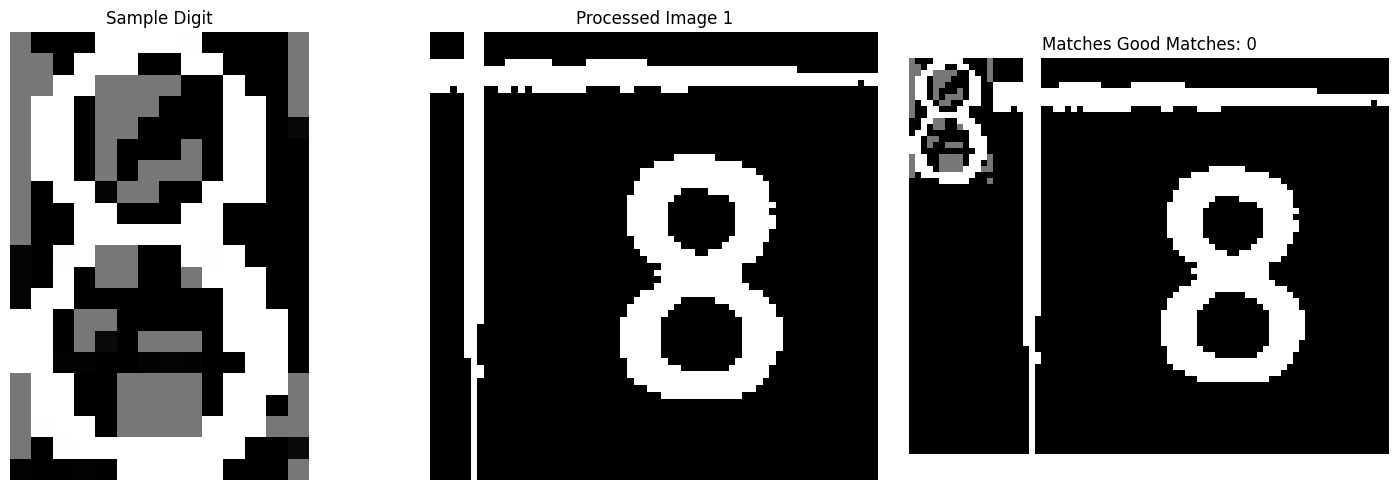

Number of good matches for the first processed image using SIFT:
Processed Image 1: 0


In [93]:
import cv2
import matplotlib.pyplot as plt

# Read your two specific images in grayscale
gray_image = cv2.imread('8.jpg', cv2.IMREAD_GRAYSCALE)
original_image_1 = cv2.imread('tile_8_5.png', cv2.IMREAD_GRAYSCALE)

# Create SIFT object
sift = cv2.SIFT_create()

# Store the number of good matches for each processed image
good_matches_count = []

# Find keypoints and descriptors for the reference image ('gray_image')
keypoints_sample, descriptors_sample = sift.detectAndCompute(gray_image, None)

# Find keypoints and descriptors for the first processed image ('original_image_1')
keypoints_processed_1, descriptors_processed_1 = sift.detectAndCompute(original_image_1, None)

# Create a Brute Force Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors_sample, descriptors_processed_1, k=2)

# Apply ratio test to find good matches for the first processed image
good_matches = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)

# Store the number of good matches for the first processed image
good_matches_count.append(len(good_matches))

# Draw the matches for the first processed image
result_image_1 = cv2.drawMatches(gray_image, keypoints_sample, original_image_1, keypoints_processed_1,
                                 good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the images and matches for the first processed image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display the sample digit
ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title('Sample Digit')
ax[0].axis('off')

# Display the processed image 1
ax[1].imshow(original_image_1, cmap="gray")
ax[1].set_title('Processed Image 1')
ax[1].axis('off')

# Display the matches for processed image 1
ax[2].imshow(result_image_1)
ax[2].set_title(f'Matches Good Matches: {len(good_matches)}')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# Display the number of good matches for the first processed image using SIFT
print("Number of good matches for the first processed image using SIFT:")
print(f"Processed Image 1: {len(good_matches)}")


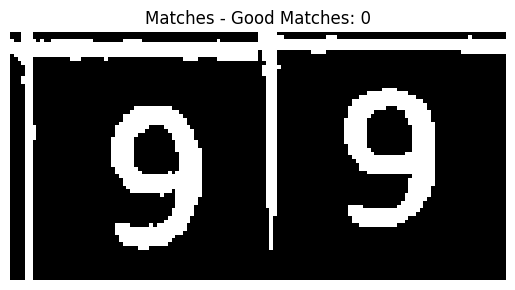

In [91]:
import cv2

# Read images
image1 = cv2.imread('tile_2_4.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('tile_8_1.png', cv2.IMREAD_GRAYSCALE)

# Create SIFT object
sift = cv2.SIFT_create()

# Find keypoints and descriptors for image1
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)

# Find keypoints and descriptors for image2
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)
descriptors1 = descriptors1.astype(np.uint8)
descriptors2 = descriptors2.astype(np.uint8)
import cv2
import matplotlib.pyplot as plt

# Assuming you have keypoints1, descriptors1, keypoints2, descriptors2 obtained from SIFT

# Create ORB object
orb = cv2.ORB_create()

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors using the BFMatcher
matches = bf.match(descriptors1, descriptors2)

# Sort matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Apply ratio test to find good matches
good_matches_orb = []
for m in matches:
    if m.distance < 40:  # Adjust this threshold as needed
        good_matches_orb.append(m)

# Draw the matches
result_image_orb = cv2.drawMatches(image1, keypoints1, image2, keypoints2,
                                   good_matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(result_image_orb)
plt.title(f'Matches - Good Matches: {len(good_matches_orb)}')
plt.axis('off')
plt.show()


In [116]:
def splitsquares(img):
        rows=np.vsplit(img,9) #vertical split
        boxes=[]
        for r in rows:
            cols=np.hsplit(r,9) #horizontal split
            for box in cols:
                boxes.append(box)
        return boxes         

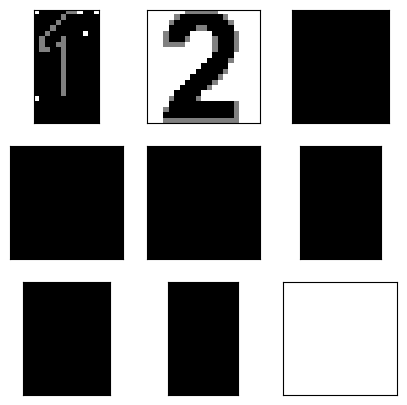

In [124]:
digit_ses = []
for i in range(9):
    se = cv2.imread(f"{i+1}.jpg", cv2.IMREAD_GRAYSCALE)
    
    if se is None:
        print(f"Error loading image {i+1}.jpg")
    else:
        se_canvas = np.zeros_like(se, dtype=np.int16)
        se_canvas[se < 64] = -1
        se_canvas[se > 192] = 1
        digit_ses.append(se_canvas)

_, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        if i * 3 + j < len(digit_ses):
            col.imshow(digit_ses[i * 3 + j], cmap="gray", vmin=-1, vmax=1)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)        

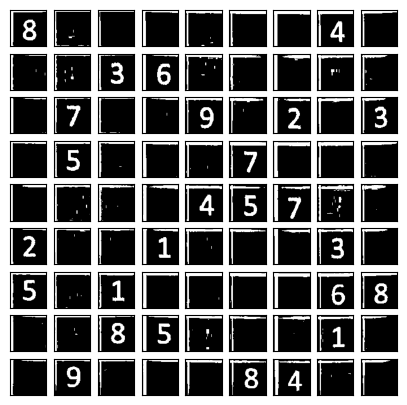

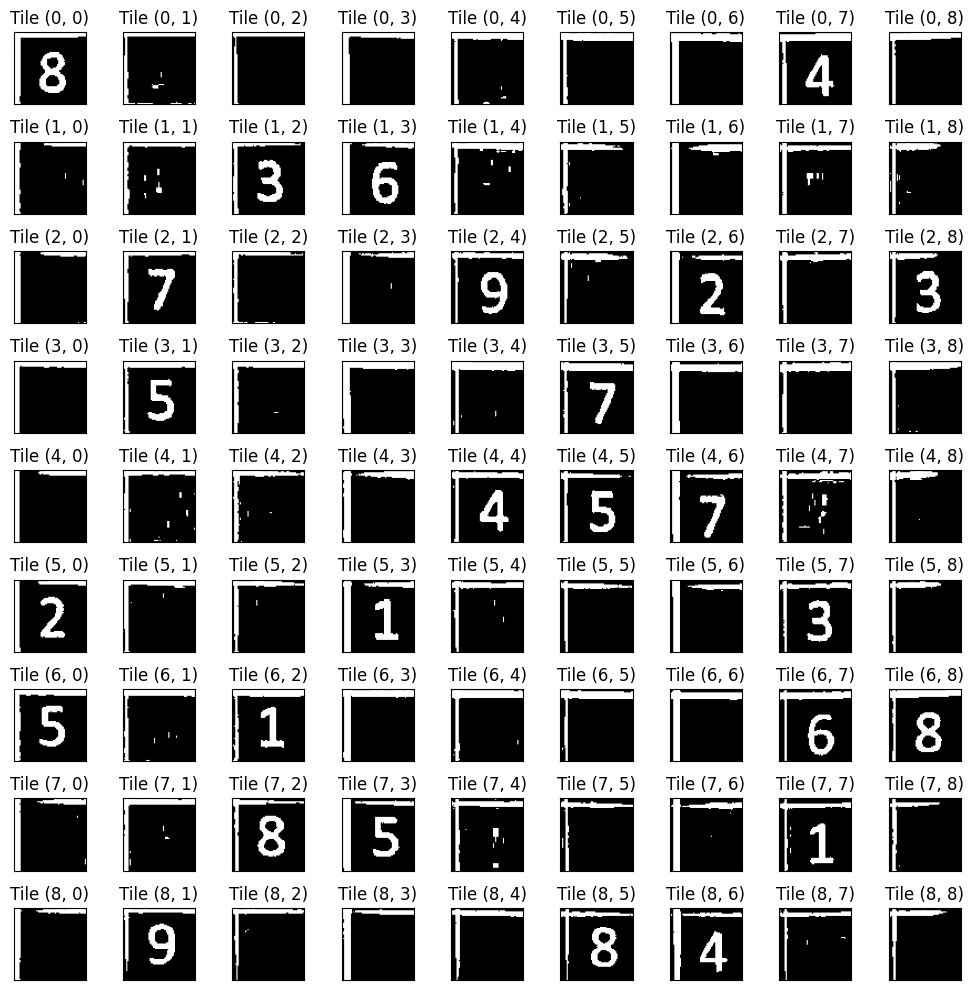

In [118]:
tiles = [cv2.threshold(number_tiles[t//9][t%9], 250, 255, cv2.THRESH_BINARY)[1] for t in range(9*9)]
# 9*9 looping from 0 to 80 to iterate over whole tiles where u try to return tile tile 
_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(tiles[i*9 + j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
fig, axes = plt.subplots(9, 9, figsize=(10, 10))

for i in range(9):
    for j in range(9):
        ax = axes[i, j]
        ax.imshow(tiles[i * 9 + j], cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(f"Tile ({i}, {j})")  # Set title to show cell coordinates
        ax.set_aspect('equal')  # Maintain aspect ratio for each tile

plt.tight_layout()  # Adjust layout for better visualization
plt.show()


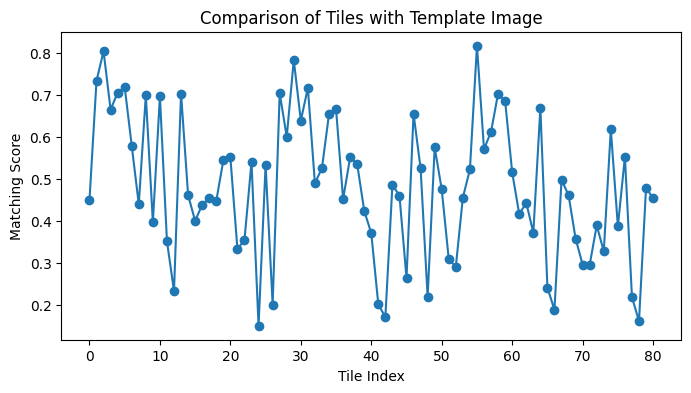

In [119]:
import cv2
import matplotlib.pyplot as plt

# Assuming 'tiles' contains your individual tiles data and 'template_image' is the template image for comparison
template_image = cv2.imread('8.png', cv2.IMREAD_GRAYSCALE)
# Function to compare a template image with each tile using template matching
def compare_tile_with_template(template, tiles):
    comparisons = []

    for tile in tiles:
        result = cv2.matchTemplate(tile, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        comparisons.append(max_val)

    return comparisons

# Example: Comparing each tile with 'template_image'
template_comparison_results = compare_tile_with_template(template_image, tiles)

# Visualize the comparison results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(template_comparison_results, marker='o')
ax.set_xlabel('Tile Index')
ax.set_ylabel('Matching Score')
ax.set_title('Comparison of Tiles with Template Image')
plt.show()


In [120]:
template1 = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)
template2 = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)
template3 = cv2.imread('3.png', cv2.IMREAD_GRAYSCALE)
template4 = cv2.imread('4.png', cv2.IMREAD_GRAYSCALE)
template5 = cv2.imread('5.png', cv2.IMREAD_GRAYSCALE)
template6 = cv2.imread('6.png', cv2.IMREAD_GRAYSCALE)
template7 = cv2.imread('7.png', cv2.IMREAD_GRAYSCALE)
template8 = cv2.imread('8.png', cv2.IMREAD_GRAYSCALE)
template_list = [template1, template2, template3, template4, template5, template6, template7, template8]
orb = cv2.ORB_create()

# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Loop through each tile and compare it with templates using ORB
for i in range(9):
    for j in range(9):
        current_tile = tiles[i * 9 + j]

        # Perform ORB on the current tile
        kp1, des1 = orb.detectAndCompute(current_tile, None)

        best_match_index = -1
        best_match_count = 0

        # Loop through each template for comparison
        for idx, template in enumerate(template_list):
            # Perform ORB on the template
            kp2, des2 = orb.detectAndCompute(template, None)

            # Match descriptors using the BFMatcher
            matches = bf.match(des1, des2)

            # Count the number of good matches
            good_matches = [m for m in matches if m.distance < 50]  # Adjust this threshold as needed
            num_good_matches = len(good_matches)

            # Keep track of the best matching template for the current tile
            if num_good_matches > best_match_count:
                best_match_count = num_good_matches
                best_match_index = idx

        # Display or store the best matched template index for the current tile
        print(f"Tile ({i}, {j}) matches best with template index: {best_match_index}")


Tile (0, 0) matches best with template index: -1
Tile (0, 1) matches best with template index: -1
Tile (0, 2) matches best with template index: -1
Tile (0, 3) matches best with template index: -1
Tile (0, 4) matches best with template index: -1
Tile (0, 5) matches best with template index: -1
Tile (0, 6) matches best with template index: -1
Tile (0, 7) matches best with template index: -1
Tile (0, 8) matches best with template index: -1
Tile (1, 0) matches best with template index: -1
Tile (1, 1) matches best with template index: -1
Tile (1, 2) matches best with template index: -1
Tile (1, 3) matches best with template index: -1
Tile (1, 4) matches best with template index: -1
Tile (1, 5) matches best with template index: -1
Tile (1, 6) matches best with template index: -1
Tile (1, 7) matches best with template index: -1
Tile (1, 8) matches best with template index: -1
Tile (2, 0) matches best with template index: -1
Tile (2, 1) matches best with template index: -1
Tile (2, 2) matches 

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\batch_distance.cpp:275: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'cv::batchDistance'


In [ ]:
import cv2
import numpy as np

# Load digit templates (replace with your actual template images)
templates = []
for i in range(1, 9):  # Adjust the range to load templates from 1 to 8
    template_img = cv2.imread(f"{i}.png", 0)
    if template_img is None:
        print(f"Error: Unable to load template {i}.png")
    else:
        templates.append(template_img)

if len(templates) != 8:
    print("Error: Not all templates were loaded successfully.")
else:
    print("Templates loaded successfully.")

# Assuming 'tiles' contains the extracted tiles as previously obtained

# Function to measure similarity between two images (customize as needed)
def custom_similarity(image1, image2):
    # Example: Normalized cross-correlation
    result = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, _ = cv2.minMaxLoc(result)
    return max_val

# Resize template images if needed
desired_width, desired_height = 28, 28  # Update with your desired dimensions
resized_templates = [cv2.resize(template, (desired_width, desired_height)) for template in templates]

# Create a grid to store predicted numbers for each cell
predicted_numbers = np.zeros((9, 9), dtype=int)

# Iterate through tiles and match with templates
for i in range(9):
    for j in range(9):
        tile = tiles[i * 9 + j]
        best_match_score = 0
        best_match_digit = None

        # Preprocess tile
        resized_tile = cv2.resize(tile, (desired_width, desired_height))

        for digit, template in enumerate(resized_templates, start=1):
            match_score = custom_similarity(resized_tile, template)
            if match_score > best_match_score:
                best_match_score = match_score
                best_match_digit = digit

        # Define a threshold for matches
        threshold = 0.2  # You can adjust this threshold
        if best_match_digit is not None and best_match_score >= threshold:
            predicted_numbers[i, j] = best_match_digit
        else:
            # If no match above threshold, consider it as 0 or empty cell
            predicted_numbers[i, j] = 0

# Print the predicted numbers grid
print("Predicted Numbers Grid:")
for i in range(9):
    for j in range(9):
        print(predicted_numbers[i, j], end=" ")
    print()  # Move to the next line for a new row


In [ ]:
import cv2
import numpy as np

# Define rules for digit recognition (adjust based on font and style)
rules = {
    "0": {"num_components": 1, "has_loop": True, "aspect_ratio": 1.0},
    "1": {"num_components": 1, "is_vertical": True, "width_to_height_ratio": 0.2},
    # ... (define rules for other digits)
}

# Function to extract features from a tile image
def extract_features(tile):
    # Extract contours
    contours, _ = cv2.findContours(tile, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyze contours and extract features
    num_components = len(contours)
    has_loop = any(cv2.pointPolygonTest(contour, (0, 0), True) >= 0 for contour in contours)  # Check for loop
    aspect_ratio = tile.shape[1] / tile.shape[0]  # Width-to-height ratio
    # ... (extract other relevant features)

    return {
        "num_components": num_components,
        "has_loop": has_loop,
        "aspect_ratio": aspect_ratio,
        # ... (add other features)
    }

# Iterate through tiles and apply rule-based analysis
for tile in tiles:
    features = extract_features(tile)
    for digit, rule in rules.items():
        if all(feature in features for feature in rule.values()):
            # Match found
            print(f"Recognized digit: {digit}")
            break

In [ ]:




# # ... Your existing code to generate `tiles` array ...
# 
# # Load template images
# template_paths=['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
# templates = []
# for path in template_paths:
#     img = cv2.imread(path, 0)
#     if img is not None:  # Check if the image was read successfully
#         templates.append(img)
#     else:
#         print(f"Error reading image: {path}")
# 
# # Get a reference cell size to resize templates accordingly
# reference_cell = tiles[0]  # Assuming all cells have the same size
# cell_size = reference_cell.shape[:2]  # Get height and width
# 
# # Resize templates to match cell size
# resized_templates = [cv2.resize(template, cell_size[::-1], interpolation=cv2.INTER_AREA) for template in templates]
# 
# # Iterate through tiles and perform matching
# for i, row in enumerate(axes):
#     for j, col in enumerate(row):
#         tile = tiles[i * 9 + j]
# 
#         best_match_val = 0  # Keep track of the best match
#         best_match_index = None
# 
#         for idx, template in enumerate(resized_templates):
#             result = cv2.matchTemplate(tile, template, cv2.TM_CCOEFF_NORMED)
#             min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
# 
#             # If this match is better than the previous best match, update
#             if max_val > best_match_val:
#                 best_match_val = max_val
#                 best_match_index = idx
# 
#         # If a strong enough match was found, display the result
#         if best_match_val > 0.8 and best_match_index is not None:
#             print(f"Number {best_match_index} detected in tile ({i}, {j})")
#             template_shape = resized_templates[best_match_index].shape[::-1]
#             cv2.rectangle(tile, max_loc, (max_loc[0] + template_shape[0], max_loc[1] + template_shape[1]), (0, 255, 0), 2)
# 
#         # Display the tile with or without the rectangle
#         col.imshow(tile, cmap="gray")
#         col.get_xaxis().set_visible(False)
#         col.get_yaxis().set_visible(False)
# 
# plt.show()



In [ ]:
# This method will tell me if the digit exists in the image or not
# But it won't tell me where; if exists
#This Function iterates over all windows in image and calculate score of matching between each image and similarity of it 
#with the digit by giving white pixels higher value 

def se_match(se, image):  
    se_height, se_width = se.shape
    MAX_SCORE = np.sum(se == 1) * 4  # Total number of value=1 pixels
    score = 0
    # Go over all windows in image and get the maximum score obtained
    for y in range(image.shape[0] - se_height):
        for x in range(image.shape[1] - se_width):
            window = image[y:y+se_height, x:x+se_width]
            temp_score = np.sum((window == 255) & (se == 1)) * 4  # Higher weight on white-matches
            temp_score -= np.sum((window == 0) & (se == -1))
            score = max(score, temp_score)
    return max(0, score/MAX_SCORE)

In [ ]:
# fig = plt.figure(figsize=(12, 4))
# gs = plt.GridSpec(5, 2)
# ax1 = fig.add_subplot(gs[:, 0])
# ax2 = fig.add_subplot(gs[1:4, 1])
# 
# tile = tiles[0]  # First tile whose value is 8
# se = digit_ses[7]  # S.E. for digit 8
# 
# max_confidence = -100
# max_confidence_se = None
# 
# # To obtain scale-invariance, let's try different input sizes
# for h in range(tile.shape[0], se.shape[0], -1):
#     #This loop iterates over different sizes of the tile, starting from its original size and decreasing.
#     #This line resizes the tile to the current height h, maintaining the aspect ratio using integer division.
#     y, x = tile.shape
#     resized_tile = cv2.resize(tile, ((h*x)//y, h), cv2.INTER_NEAREST)
#         # resizes the tile to the current height h, maintaining the aspect ratio using integer division.
#     resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
#         #thresholds the resized tile, converting it into a binary image.
#     
#     confidence = se_match(se, resized_tile)
#     #calculates the confidence score by matching the resized tile with the structural element using the se_match function.
#     if confidence >= max_confidence:
#         max_confidence = confidence
#         max_confidence_se = se
# 
# ax1.imshow(resized_tile, cmap="gray");
# ax1.set_title(f"Resized Tile [Size = {resized_tile.shape}]");
# ax2.imshow(max_confidence_se, cmap="gray", vmin=-1, vmax=1);
# ax2.set_title(f"Digit 8 S.E. [Confidence = {round(100*max_confidence, 4)}%]");
# Assuming tiles is a list of image tiles and digit_ses is a list of structural elements
for tile_index, tile in enumerate(tiles):
    for se_index, se in enumerate(digit_ses):
        max_confidence = -100
        max_confidence_tile = None

        # To obtain scale-invariance, let's try different input sizes
        for h in range(tile.shape[0], se.shape[0], -1):
            y, x = tile.shape
            resized_tile = cv2.resize(tile, ((h * x) // y, h), cv2.INTER_NEAREST)
            resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
            
            confidence = se_match(se, resized_tile)
            
            if confidence >= max_confidence:
                max_confidence = confidence
                max_confidence_tile = resized_tile

        # At this point, max_confidence contains the maximum confidence for the current tile and se pair
        # max_confidence_tile contains the resized tile with the highest confidence
        
        # Perform further actions with the obtained results, such as storing or visualizing them
        # For example, you can print the index of the current tile and structural element with their corresponding maximum confidence:
        print(f"Tile Index: {tile_index}, SE Index: {se_index}, Max Confidence: {round(100 * max_confidence, 4)}%")

In [ ]:
sitiles = []  # Scale-invariant tiles used to store structure elements with different sizes
y, x = tiles[0].shape
for i, tile in enumerate(tiles):
    sitiles.append([])
    for h in range(y//2, digit_ses[0].shape[0], -1):
        #This inner loop iterates over different heights (h) starting from half of the original tile's height (y//2) and going down to the height 
        #of the structural element for the digit 0 (digit_ses[0].shape[0]) in reverse order.
        resized_tile = cv2.resize(tile, ((h*x)//y, h), cv2.INTER_NEAREST) #resize current tile to specified H height 
        resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
        sitiles[i].append(resized_tile)
     
      

In [ ]:
nest_asyncio.apply()

In [ ]:
sudoku_ocr = np.zeros((9*9,))

def ocr_progress(init=False):
    if init: ocr_progress.value = 0
    else: ocr_progress.value += 1
    print(f"\r[{u'█'*ocr_progress.value}{('-'*(9*9-ocr_progress.value))}] {ocr_progress.value}/{9*9} tiles processed.", end='')

async def ocr(tileno, min_confidence):
    max_confidence = -100
    max_confidence_se = None
    max_confidence_se_i = -1
    ax1 = fig.add_subplot(gs[tileno*7+1:(tileno+1)*7-1, 0]);
    ax1.set_title(f"Tile [{tileno//9}][{tileno%9}]");
    ax1.imshow(tiles[tileno], cmap="gray");
    for tile in sitiles[tileno]:
        for se_i, se in enumerate(digit_ses):
            confidence = se_match(se, tile)
            if confidence > max_confidence:
                max_confidence = confidence
                max_confidence_se = se
                max_confidence_se_i = se_i
                print("Max-Confidence",max_confidence)
                print("Min_Confidence",min_confidence)
    if max_confidence >= min_confidence:
        print(max_confidence)
        ax2 = fig.add_subplot(gs[tileno*7+2:(tileno+1)*7-2, 2]);
        ax2.set_title(f"S.E. [Confidence = {round(max_confidence*100, 4)}%]");
        ax2.imshow(max_confidence_se, cmap="gray");
        sudoku_ocr[tileno] = max_confidence_se_i + 1
    ocr_progress()

In [ ]:
import asyncio
import nest_asyncio
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 200))
gs = plt.GridSpec(7*9*9, 3)
ocr_progress(init=True)  # Initial progress (0 tiles processed)
await asyncio.wait(
    [asyncio.create_task(ocr(tileno, 0.22)) for tileno in range(9*9)]
);

In [ ]:
def textize_sudoku(board):
    sudoku_ocr_text = ''
    for i, row in enumerate(board):
        sudoku_ocr_text += ' ├───────────┼───────────┼───────────┤ ' if (i%3 == 0) else ' │           │           │           │ '
        sudoku_ocr_text += '\n'
        sudoku_ocr_text += ' │ '
        for j, cell in enumerate(row): sudoku_ocr_text += f"{cell if cell != 0 else ' '} {' ' if (j%3 != 2) else '│'} "
        sudoku_ocr_text += '\n'
    sudoku_ocr_text += ' ├───────────┼───────────┼───────────┤ '
    return sudoku_ocr_text

In [ ]:
def find_next_empty_cell(board):
    for i in range(9):
        for j in range(9):
            
            if board[i][j] == 0:
                return (i, j)
    return None

def is_valid(board, num, row, col):
    for i in range(9):  # row and column checks
        if board[row][i] == num and col != i: return False
        if board[i][col] == num and row != i: return False

    # Check box
    box_row = (row // 3) * 3
    box_col = (col // 3) * 3
    for i in range(box_row, box_row + 3):
        for j in range(box_col, box_col + 3):
            if board[i][j] == num and (i, j) != (row, col):
                return False
    return True

def solve(board):
    empty_cell_pos = find_next_empty_cell(board)
    if empty_cell_pos == None: return True  # No empty cells; board is solved
    row, col = empty_cell_pos
    for num in range(1, 10):
        if is_valid(board, num, row, col):  # Find a valid value to proceed with
            board[row][col] = num  # 'num' seems valid (so far), proceed with it
            if solve(board): return True  # Try to solve the rest of the board
            board[row][col] = 0  # Couldn't continue? Then 'num' was wrong! :(
    return False

def solve_sudoku(board):
    sudoku_to_solve = np.copy(board)
    solve(sudoku_to_solve)
    solved_sudoku = []
    for i in range(9):
        solved_sudoku.append([])
        for j in range(9):
            solved_sudoku[i].append("\033[1m"+str(board[i][j])+"\033[0m" if (board[i][j] != 0) else "\033[91m"+str(sudoku_to_solve[i][j])+"\033[0m")
    return solved_sudoku

In [ ]:
plt.imshow(img);
plt.figtext(1, 0.125, textize_sudoku(sudoku_ocr.reshape((9, 9)).astype(int)), fontfamily='monospace');

In [ ]:
print(textize_sudoku(solve_sudoku(sudoku_ocr.reshape((9, 9)).astype(int)))

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the larger image
large_image = cv2.imread('path_to_large_image.png')
#large_image_gray = cv2.cvtColor(large_image, cv2.COLOR_BGR2GRAY)

# Load the original template
original_template = cv2.imread('C:/Users/Mazen Mohamed/PycharmProjects/cvphase1/output/number_4.png')
template = original_template.copy()
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Define the scaling factor for resizing the template
scaling_factor = 1.2  # You can adjust this value based on your needs

# Loop through each tile and perform template matching
for i in range(9):  # Assuming 9 rows of tiles
    for j in range(9):  # Assuming 9 columns of tiles
        # Load the tile
        tile_path = f'tile_{i}_{j}.png'
        tile = cv2.imread(tile_path)
        if tile is None:
            print(f"Tile {i}_{j} not found!")
            continue
        
        tile_gray = cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY)

        # Perform template matching
        template = original_template.copy()
        while True:
            if template.shape[0] < tile.shape[0] and template.shape[1] < tile.shape[1]:
                # Perform template matching
                result = cv2.matchTemplate(tile_gray, template_gray, cv2.TM_CCOEFF_NORMED)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

                # Threshold for similarity - adjust based on your needs
                threshold = 0.6

                if max_val >= threshold:
                    # Template matched successfully, get the coordinates
                    top_left = max_loc
                    h, w = template.shape[:2]
                    bottom_right = (top_left[0] + w, top_left[1] + h)

                    # Draw a rectangle around the matched region on the tile
                    matched_tile = tile.copy()
                    cv2.rectangle(matched_tile, top_left, bottom_right, (0, 255, 0), 2)

                    # Display the matching result for this tile
                    plt.imshow(cv2.cvtColor(matched_tile, cv2.COLOR_BGR2RGB))
                    plt.title(f'Matching Result for Tile ({i}, {j})')
                    plt.xticks([]), plt.yticks([])
                    plt.show()

                    break  # Break the loop as the template has successfully matched

            # Resize the template for the next iteration (reduce size)
            template = cv2.resize(template, None, fx=scaling_factor, fy=scaling_factor)
            template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

        # Reset the template size for the next tile
        template = original_template.copy()
        template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
